$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\vc}[1]{\begin{pmatrix}#1_1\\#1_2\end{pmatrix}}
\newcommand{\vd}[1]{\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
\newcommand{\ffud}[2]{\frac{\mathrm{d}^2 #1}{\mathrm{d} #2^2}}
\newcommand{\dd}{\,\mathrm{d}}
$$

# Bubble motion in a sound field


$$\vb{F}_B=-\left<V(t)\,\nabla p(\vb{x},t)\right>_{t_{av}}$$

where $V=(4\pi/3)R^3(t)$ is the bubble volume and $\nabla p(\vb{x},t)$ the gradient of the pressure, and $\left<\dots\right>_{t_{av}}$ denotes a time average of the expression. This time average should be taken over one period of oscillation: 

$$\left<f(t) \right>_{t_{av}}=\frac{1}{T}\int_0^T f(t)\,\mathrm{d}t\tag{1}\quad .$$

We will first derive the expression for the Bjerknes force generated by an external sound field and then look at the interaction of two bubbles exposed two the sound of each other.

## Primary Bjerknes Force in a Standing Wave

We assume a bubble is driven by an external sound field $p(t)$. The sound field is further assumed to be a standing wave.

Generally, a standing wave can be constructed from the superposition of an outgoing and incoming wave, e.g.

$$p=p_a\sin(kx-\omega t )+p_a\sin(kx+\omega t)=2\,p_a\sin(kx)\cos(\omega t)\quad .$$

The primary Bjerknesforce is a time average of the spatial pressure gradient and the bubble volume. The spatial gradient is:

$$\nabla p=2\,p_a\,k\cos(kx)\cos(\omega t)\,\vb{e}_x\quad .$$

respectively. Let's assume the bubble undergoes harmonic oscilation around an equilibrium radius $R_0$, i.e. 

$$R(t)=R_0 (1-\eps\sin(ky)\cos(\omega t-\varphi))$$

Here the amplitude $R_0 \eps$ is modulated by the local and temporal pressure $\sin(ky)\cos(\omega t-\varphi)$. A bubble much smaller than resonance size is oscillating in phase $\varphi=0$ and a bubble much larger than resonance size out of phase $\varphi=\pi$.

The volume oscillation $V(t)$ can be approximated with a Taylor expansion to first order:

$$V(t)=\frac{4\pi}{3}\,R^3(t)=\frac{4\pi}{3}\,R_0^3\left(1-\eps\sin(kx)\cos(\omega t -\varphi)\right)^3\approx V_0\left(1-3\eps\sin(kx)\cos(\omega t-\varphi)\right)$$

Now we insert above expression into the definition of the Bjerknes force.

$$\vb{F}_B=-\left<V(t)\nabla p\right>_{av}=
-\vb{e}_x\,V_0\frac{2 p_a k}{T}\int_0^T \left(1-3\eps\cos(kx)\cos(\omega t -\varphi)\right)\left(\sin(kx)\cos(\omega t)\right)\mathrm{d}t$$

and calculate the parts. Integrals of products of $\sin^n$ $\cos^n$ with odd power ($n=1,3,\dots$) are zero over one period. 

$$F_B=-2\frac{\omega}{\pi} V_0 k \int_0^T \underbrace{\sin(kx)\cos(\omega t)}_{=0} - 3\eps\sin(kx)\cos(kx)\cos(\omega t-\varphi)\cos(\omega t)\mathrm{d}t$$

$$F_B=\frac{3}{2}\pi\omega k p_A V_0\eps\underbrace{\sin(kx)\cos(kx)}_{\frac{1}{2}\sin(2 k x)}\int_0^T \underbrace{\cos^2(\omega t)}_{=\pi}\cos(\varphi)+\underbrace{\sin(\omega t)\cos(\omega t)}_{=0}\sin(\varphi)\mathrm{d}t$$

The final result is 

$$F_B=\frac{3}{4} V_0 p_A k \eps \sin(2 k x)\cos(\varphi)\quad .$$

In [1]:
%matplotlib inline

import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['font.size'] = 15

x = np.linspace(0.,2.*np.pi, 1000)
omega=1.
k=1.

plt.figure(1, figsize=(8, 6));

def update_plot(x0,phi):
    Fb=np.sin(2*k*x0)*np.cos(phi)
    plt.clf()
    ax=plt.gca()
    ax.plot(x,np.sin(k*x),'k-')
    ax.plot(x,-np.sin(k*x),'k-')
    ax.plot(x,np.sin(2.*k*x),'r')
    ax.plot(x0,np.sin(k*x0),'o',markersize=12+24*(phi/np.pi))
    plt.arrow(x0, np.sin(k*x0), Fb, 0.,width=0.05)
    ax.axhline(linewidth=1, color='k')
    ax.set_xlabel(r'space $x$')
    ax.set_xlim(0, 2.*np.pi)
    ax.set_ylim(-1.1, 1.1) 
    plt.show();

x0w=widgets.FloatSlider(value=np.pi, description=r'$x_b$', max=2*np.pi, min=0, step=np.pi/10.)
phiw=widgets.FloatSlider(value=0., description=r'$\varphi$', max=np.pi, min=0., step=np.pi/10.)

widgets.interactive(update_plot, x0=x0w, phi=phiw)


interactive(children=(FloatSlider(value=3.141592653589793, description=u'$x_b$', max=6.283185307179586, step=0.3141592653589793), FloatSlider(value=0.0, description=u'$\\varphi$', max=3.141592653589793, step=0.3141592653589793), Output()), _dom_classes=('widget-interact',))

## Secondary Bjerknes Force between two oscillating bubbles

The velocity field of a bubble

$$u_r=\frac{R^2\dot{R}}{r^2}\tag{2}$$

We need later this expression for the temporal derivative of the Volume

$$\fud{V}{t}=\frac{4\pi}{3}\fud{R^3}{t}=4\pi\left(R^2\dot{R}\right)\quad .\tag{3}$$

To obtain the pressure radiated by a spherical oscillating bubble we make use the Euler Equation in spherical coordinate

$$\rho\pad{u_r}{t}+u_r\pad{u_r}{r}=-\pad{p}{r}\quad . \tag{4}$$

By ignore the convective derivative (why?) we can integrate Eq.(4) with respect to $r$

$$\pad{p}{r}=-\frac{\rho}{r^2}\fud{}{t}\left(R^2\dot{R}\right)$$

and therefore we obtain

$$p=\frac{\rho}{r}\fud{}{t}\left(R^2\dot{R}\right)\quad .\tag{5}$$

The effect of a bubble oscillating next to a second bubble is *twofold*:
* it generates an additional driving pressure for the second bubble and
* it generates a pressure gradient resulting in a force on the second bubble.

Let's focus on the *intanteous force* oscillating bubble 1 generates on bubble 2

$$\vb{F}_{12}=-V_2\nabla p_1\quad .$$

Inserting Eq.(5) for bubble 2 at a distance $r=d$:

$$\vb{F}_{12}=-V_2 \left. \pad{p_1}{r} \right|_{r=d} \vb{e}_r=
V_2\frac{\rho}{d^2}\fud{}{t}\left(R^2\dot{R}\right)\vb{e}_r=
\frac{\rho}{4\pi\,d^2} V_2\ffud{V_1}{t}\vb{e}_r\tag{6}\quad .$$

Integration by parts of Eq.(6) we can reduce the order the temporal derivative:

$$\frac{1}{T}\int_0^T V_2 \ddot{V_1} \mathrm{d}t=\left. V_2 \dot{V_1}\right|_0^T - \int_0^T \dot{V_2}\dot{V_1}\mathrm{d}t\tag{7}\quad ,$$

because the first term on the R.H.S. for periodic expressions is 0. Thus

$$\frac{1}{T}\int_0^T V_2 \ddot{V_1} \mathrm{d}t=- \int_0^T \dot{V_2}\dot{V_1}\mathrm{d}t$$

The Bjerknes force which is the time averag of Eq.(6) excerted by bubble 1 onto bubble 2 is thus

$$\vb{F}_B=\left<\vb{F}_{12}\right>_{t_{av}}=
-\frac{\rho}{4\pi\, d^2}\left< \dot{V_1}\dot{V_2}\right>_{t_{av}}\,\vb{e}_r\quad \tag{8}$$

To obtain some simple understanding how bubble attract or repulse we calculate the Bjerknes force $vb{F}_B$ for two bubbles oscillate which oscillate harmonically. Yet we do not fix their size ($R_{10}$, $R_{20}$), amplitude of oscillation ($\epsilon_1$,$ \epsilon_2$), and phase difference between their oscillation $\varphi$.

\begin{eqnarray}
R_1(t)&=&R_{10}(1+\epsilon_1\sin(\omega t))\\
R_2(t)&=&R_{20}(1+\epsilon_2\sin(\omega t-\varphi))\tag{9}
\end{eqnarray}


Inserting Eqs.(9) into the expression for the Bjerknesforce between two bubbles 
and the integration Eq.(1) we obtain after a lengthy but straightforward calculation:

\begin{eqnarray}
\left< \dot{V_1}\dot{V_2}\right>_{t_{av}}=(4\pi)^2 R_{10}^3 R_{20}^3 \epsilon_1 \epsilon_2 \omega^2
\left( \pi \epsilon_1 \epsilon_2 + \cos\varphi \left[\pi+\frac{\pi}{4}\left( \epsilon_1^2 + \epsilon_2^2 \right) \right]+\\
\sin^2\varphi\cos\varphi\left[\frac{5\pi}{4}\epsilon_2^2+\frac{3\pi}{8}\epsilon_1^2\epsilon_2^2\right]+\cos^3\varphi\frac{\pi\epsilon_1\epsilon_2}{8}
\right)\tag{10}
\end{eqnarray}

In [2]:
%matplotlib inline

import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['font.size'] = 15

t = np.linspace(0.,2.*np.pi, 1000)
omega=1.
R10=1e-3
R20=1e-3
plt.figure(1, figsize=(8, 6));

def update_plot(eps1,eps2,phi):
    par=(np.pi*eps1*eps2+np.cos(phi)*(np.pi+np.pi/4.*(eps1**2.+eps2**2.))+
        np.sin(phi)**2*np.cos(phi)*(5./4.*np.pi*eps2**2+3./8.*np.pi*eps1**2*eps2**2)+
        np.cos(phi)**3*np.pi*eps1*eps2/8.)
    V1V2dot_avg=(4.*np.pi)**2.*R10**3.*R20**3.*eps1*eps2*omega**2.*par
    R1=R10*(1.+eps1*np.sin(omega*t))
    R2=R20*(1.+eps2*np.sin(omega*t-phi))
    R1dot=R10*eps1*omega*np.cos(omega*t)
    R2dot=R20*eps2*omega*np.cos(omega*t-phi)
    V1V2dot=(4*np.pi)**2*R1**2*R1dot*R2**2*R2dot
    plt.clf()
    ax=plt.gca()
    ax2 = ax.twinx() #second y-axis for instanteneous Bjerknes force
    ax.plot(t,eps1*np.sin(omega*t))
    ax.plot(t,eps2*np.sin(omega*t-phi))
    ax.text(0,0,'{}'.format(V1V2dot_avg))
    ax2.plot(t,V1V2dot,'k-')

    ax.set_xlabel(r'time $t$')
    ax.set_xlim(0, 2.*np.pi)
    ax.set_ylim(-0.1, 0.1)
    
    plt.show();

eps1w=widgets.FloatSlider(value=.05, description=r'$\epsilon_1$', max=.1, min=0., step=0.01)
eps2w=widgets.FloatSlider(value=.05, description=r'$\epsilon_2$', max=.1, min=0., step=0.01)
phiw=widgets.FloatSlider(value=0., description=r'$\varphi$', max=np.pi, min=-np.pi, step=np.pi/10.)

widgets.interactive(update_plot, eps1=eps1w, eps2=eps2w, phi=phiw)


interactive(children=(FloatSlider(value=0.05, description=u'$\\epsilon_1$', max=0.1, step=0.01), FloatSlider(value=0.05, description=u'$\\epsilon_2$', max=0.1, step=0.01), FloatSlider(value=0.0, description=u'$\\varphi$', max=3.141592653589793, min=-3.141592653589793, step=0.3141592653589793), Output()), _dom_classes=('widget-interact',))

Assume that the two bubbles oscillate in phase, $\varphi=0$, then the R.H.S. of Eq.(10) is positive and therefore the force, Eq.(8) attractive (or in other words in $-\vb{e}_r$-direction). When the bubbles are oscillating out of phase $\varphi=\pi$ the Bjerknesforce becomes repulsive. Thus for simple harmonic oscillating bubbles the Bjerknesforce is attractive for two identical bubbles, while one bubble is much larger and the other much smaller than the resonance size ($\varphi=\pi$) they repell each other. 



## Programs to calculate and display secondary Bjerknes Force coefficient $f_B$

In [ ]:
# Calculate secondary Bjerknes Force
import numpy as np  
from scipy import math
from scipy.integrate import odeint
import matplotlib.pylab as plt

import ipdb
def rpode(y,t):
    
    #shape of the y variable
    #y = [    Rb_N=1,...., Rb_N=N, 
    #         Ub_N=1,...., Ub_N=N,
    #         x_N=1,x_N=2,x_N=3,...,x_N=N,
    #         y_N=1,y_N=2,y_N=3,...,y_N=N,
    #         u_N=1,u_N=2,u_N=3,...,u_N=N,
    #         v_N=1,v_N=2,v_N=3,...,v_N=N]

    Rb =  y[0:2]  #bubble radius
    Ub =  y[2:4]  #bubble wall velocity  
    #RP equation coupled    
    A=np.zeros((2,2))   #matrix for the bubble oscillation
    b=np.zeros(2)
    pex = -pa*np.sin(2.*np.pi*f*t)
    dpexdt=-pa*2.*np.pi*f*np.cos(2.*np.pi*f*t)
    
   
    for n in xrange(0,2):
        Pn=(pinf+2.*sigma/r0[n])*(r0[n]/Rb[n])**(3.*gamma)\
            -2.*sigma/Rb[n]-4.*mu*Ub[n]/Rb[n]-pinf-pex
        dPndt=-3.*gamma*Ub[n]/Rb[n]*(pinf+2.*sigma/r0[n])*(r0[n]/Rb[n])**(3.*gamma)\
              +2.*sigma*Ub[n]/(Rb[n]**2)+4.*mu*(Ub[n]/Rb[n])**2-dpexdt
        A[n,n] = Rb[n]*(1.-Ub[n]/c)-4.*mu/rho/c
        b5=0.
        
        for i in xrange(0,2):
            if i is not n:
                alpha = 1.
                #Bubble oscillations
                A[n,i] = Rb[i]**2/dist*alpha
                b5 += 2.*Rb[i]*(Ub[i]**2)/dist*alpha
                    
        
        b1=(1.5-0.5*Ub[n]/c)*(Ub[n]**2)
        b2=Pn/rho*(1.+Ub[n]/c)
        b3=Rb[n]/rho/c*dPndt
        b[n]=-b5-b1+b2+b3
   
    Ab = np.linalg.solve(A, b)
    
 
    return np.concatenate((Ub,Ab))

%matplotlib inline
import time
from IPython.display import clear_output

rho = 998
pinf = 1e5
pa = 0.1e5
sigma = 0.072
gamma = 1.4 
c = 1.5e3 #speed of sound
f = 1.1e6 #frequency
Tp = 8 #number of periods
Tpa = 4 #number of periods analyzed
tspan = float(Tp)/f #duration of simulation
mu = 1e-3 #dynamic viscosity

NN = 100
ra=np.linspace(1e-6, 10e-6, NN)

fbjerk=np.zeros((NN,NN))

nncount=0
for i in range(0,ra.size):
    for j in range(i,ra.size):
        nncount +=1
        
        r0 = np.array([ra[i],ra[j]])
        dist = r0.cumsum()[-1]*2.
        print("R1={0}um R2={1}um".format(r0[0],r0[1]))
        
        #Initial conditions
        Rstart = np.copy(r0)
        Ustart = np.zeros(2)
        yinit = np.concatenate((Rstart,Ustart))

        nn = 20000   #total samples
        nnp = int(nn*Tpa/Tp) #samples to calculate Bjerknes force

        t = np.linspace(0.,tspan,nn)

        y = odeint(rpode,yinit,np.linspace(0.,tspan,nn),rtol=1e-7, atol=1e-7)

        Rb1 = y[-nnp:,0]
        Rb2 = y[-nnp:,1]
        Ub1 = y[-nnp:,2]
        Ub2 = y[-nnp:,3]
        tt = t[-nnp:]
        #plt.figure(1,figsize=(7,7))
        #plt.subplot(2,1,1)
        #plt.plot(tt*f, Rb1*1e6,tt*f, Rb2*1e6);
        #plt.subplot(2,1,2)
        #plt.plot(tt*f,Rb1*Rb1*Ub1*Rb2*Rb2*Ub2*1e18)
        
        fbjerk[i,j]=rho*4*np.pi*np.trapz(Rb1*Rb1*Ub1*Rb2*Rb2*Ub2,tt)*f/Tpa
        print("Fbjerk {0}  {1}%".format(fbjerk[i,j],nncount*100./NN/NN*2.))
        time.sleep(0.1)
        clear_output(wait=True)
        
        
        

Text(0,0.5,u'Radius ($\\mu$m)')

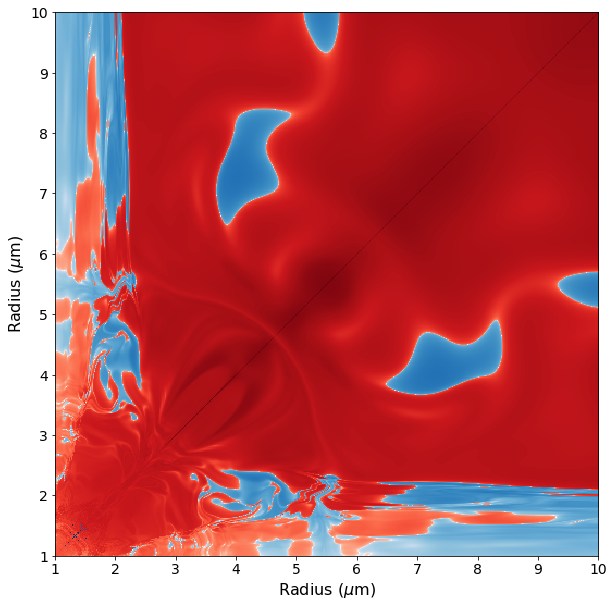

In [5]:
#Display the calculated values in 2 dimensions
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 18
%matplotlib inline
NN=100
ra=np.linspace(1e-6, 10e-6, NN)
fbjerk=np.load('pa=2.7bar_xxlarge.npy')
k = np.ma.array(fbjerk+fbjerk.T)
for i in range(0,NN):
    k[i,i]=k[i,i]/2.
kp = np.ma.masked_where(k < 1e-20 , k)
kn = np.ma.masked_where(k > -1e-20, k)
myextent=np.array([ra[0],ra[-1],ra[0],ra[-1]])*1e6

plt.figure(figsize=(10,10))
caxp=plt.imshow(np.ma.log10(kp),interpolation='nearest',origin='lower',\
                extent=myextent,cmap='Reds');

caxn=plt.imshow(np.ma.log10(-kn),interpolation='nearest',origin='lower',\
                extent=myextent,cmap='Blues');
plt.xlabel('Radius ($\mu$m)')
plt.ylabel('Radius ($\mu$m)')
#plt.savefig('pa=2.7bar_xxlarge.png',dpi=150)